Giuseppe Galilei s295620

# Homework 3

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter
import copy
import itertools

In [2]:
#associate a state to an integer number
def stateToInt(state):
    if state=="S":
        return 0
    if state=="I":
        return 1
    if state=="R":
        return 2 

# 1

## 1.1

In [3]:
def generate_symmetryK_regular_graph(n,k):
    #n is the number of nodes, k is the number of nodes each node is connected to
    
    #list of offsets for building links
    offsets=list(range(1, int(k/2 +1)))
    #the graph is generated connecting each node i to node i+x and i-x where x is the offset value
    return nx.circulant_graph(n, offsets)

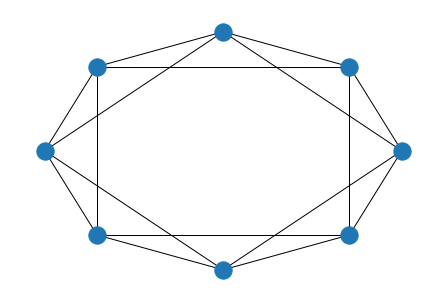

In [4]:
G=generate_symmetryK_regular_graph(8,4)
nx.draw_shell(G)

In [5]:
#put together stats about the week with or without vaccination
def compute_week_stats(count, changes, vaccine=False):
    
    if vaccine:
         stat=np.zeros(7,dtype=int)
    else:
         stat=np.zeros(5,dtype=int)
            
    for i in range(3):
        stat[i]=count[i]
    stat[3]=changes[0]
    stat[4]=changes[1]
    
    if vaccine:
        stat[5]=count[3]
        stat[6]=changes[2]
        
    return stat

In [79]:
def simulate_SIR(G, n_weeks, beta, rho, start_infected_n):
    # Susceptible=0
    # Infected=1
    # Recovered=2
    
    #create initial state vector
    state=np.zeros(len(G)-start_infected_n)
    #insert elements of value 1 (infected) in random position, in an array of zeros
    state=np.insert(state, np.random.choice(len(state), size=start_infected_n), np.ones(start_infected_n))
    
    #array to store weekly changes in infected and recovered
    changes=np.zeros(2, dtype=int)
    changes[0]=start_infected_n
    
    #initialize array of weekly statistics with the initial configuration
    week_stats=np.array([compute_week_stats(Counter(state), changes)])
    
    for week in range(n_weeks):
        state_old=copy.deepcopy(state)
        
        #reset changes array
        changes=np.zeros(2, dtype=int)
        
        for agent in G.nodes():
            
            if(state_old[agent]==0):
                #agent is susceptible and can be infected
                m=0
                for neighbor in G.neighbors(agent):
                    if state_old[neighbor]==1:
                        m+=1
                
                #probability of not getting infected
                prob=np.power(1-beta, m)
                state[agent]=np.random.choice([0,1], p=[prob, 1-prob])
                #if agent is infected
                if(state[agent]==1):
                    changes[0]+=1
                
                
            if(state_old[agent]==1):
                #agent is infected but can recover
                state[agent]=np.random.choice([1,2], p=[1-rho, rho])
                #if agent recovers
                if(state[agent]==2):
                    changes[1]+=1
                    
        #update weekly statistics list            
        week_stats=np.vstack([week_stats, compute_week_stats(Counter(state), changes)])

        
    return week_stats

In [80]:
G=generate_symmetryK_regular_graph(500,4)
stat=simulate_SIR(G, 15, 0.3, 0.7, 10)
for iter in range(99):
    stat+=simulate_SIR(G, 15, 0.3, 0.7, 10)
stat=stat/100

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


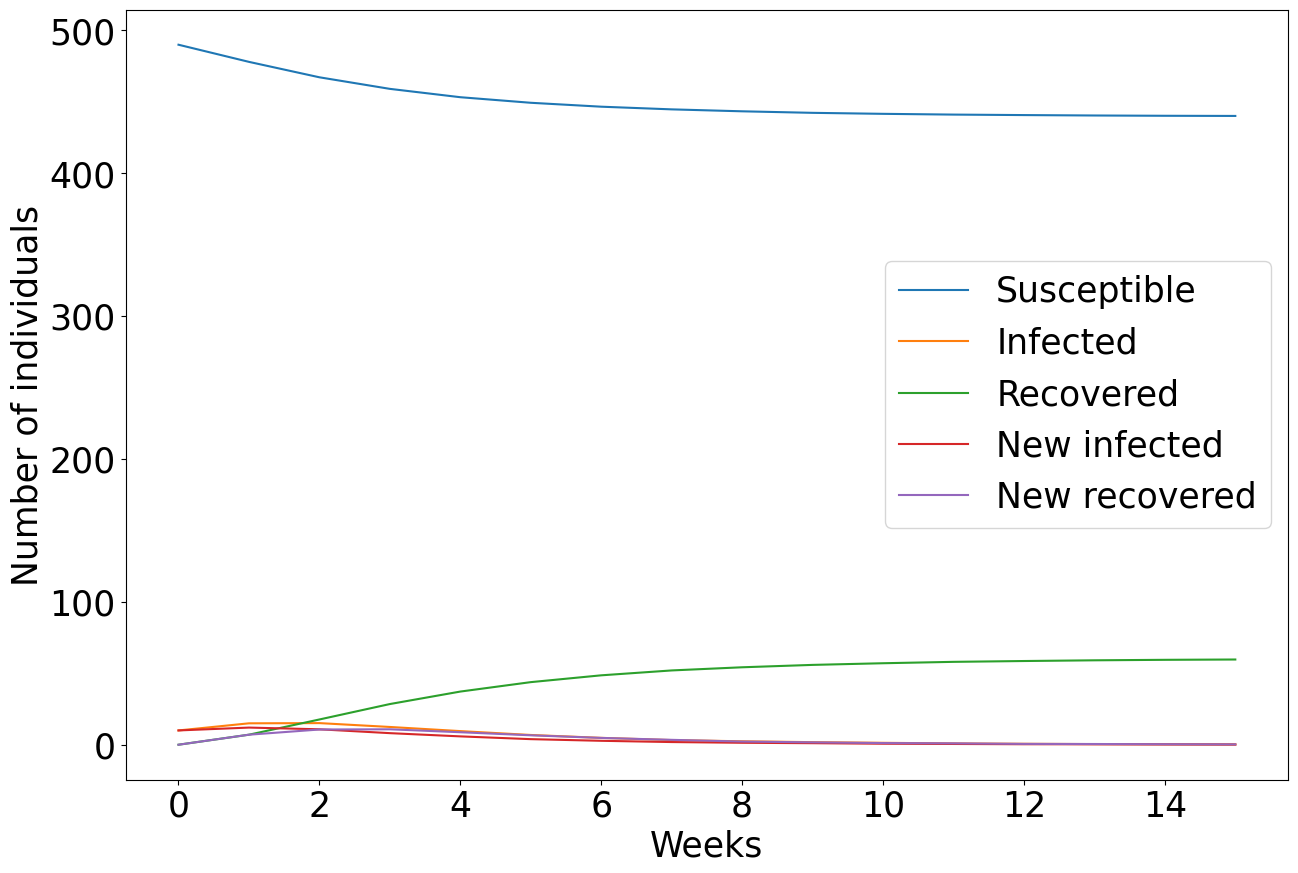

In [81]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)
labels=['Susceptible', 'Infected', 'Recovered', 'New infected', 'New recovered']
for statistics in range(5):
    trajectory = np.array(stat).T[statistics,:]
    ax.plot(trajectory, label=labels[statistics])
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex1_1.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


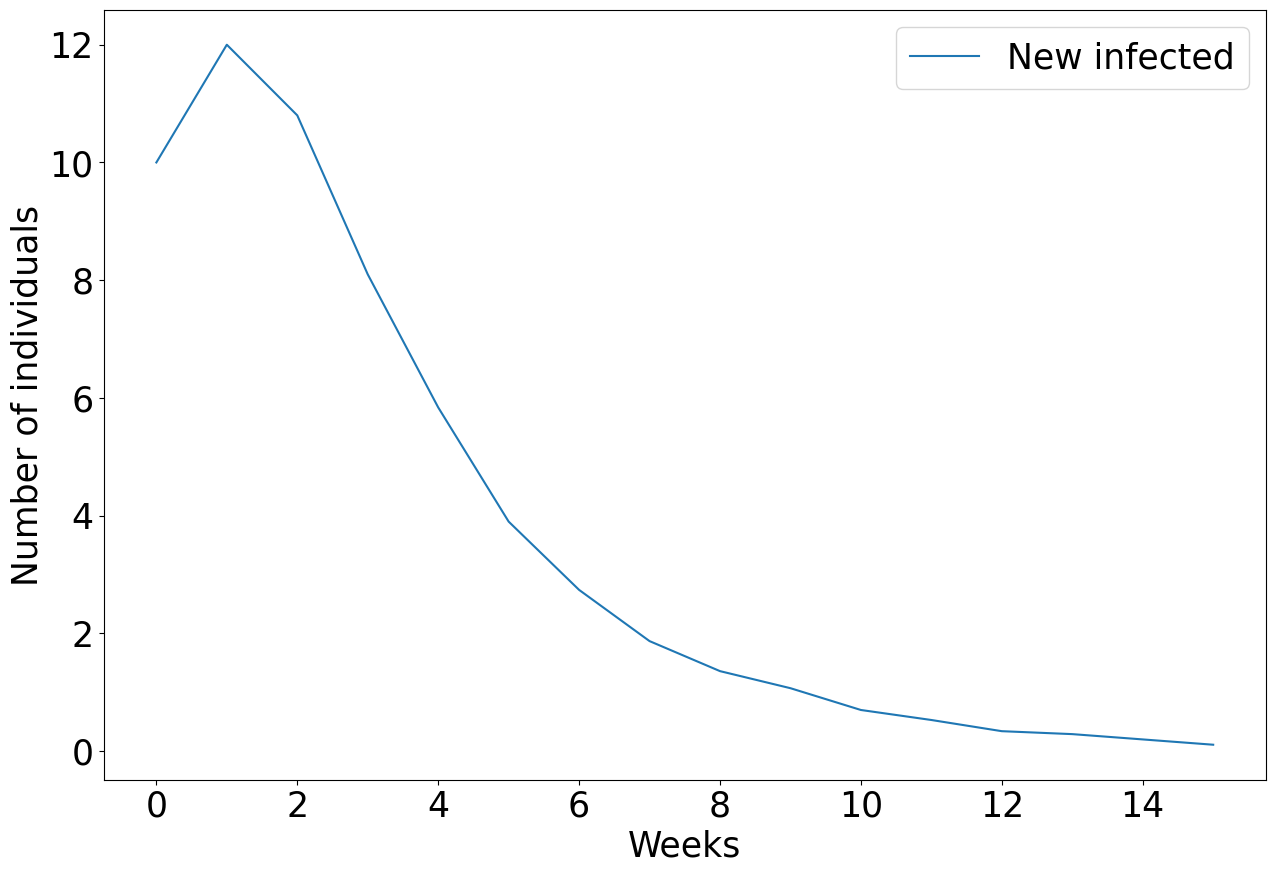

In [82]:
plt.style.use('default')
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)

ax.plot(stat[:,3], label='New infected')
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex1_1_new.eps",format='eps')

## 1.2

In [9]:
#generate random graph with preferential attachment
def generate_RandomGraph_PA(k, n_nodes):
    G=nx.complete_graph(k+1)
    
    k_is_odd=False
    if (k%2!=0):
        k_is_odd=True
        
    c=int(k/2)
    
    for i in range (k+1,n_nodes):
        degrees = [degree for (node, degree) in sorted(G.degree(), key=lambda pair: pair[0])]
        probabilities=np.array(degrees)/(G.number_of_edges()*2)
        selected_nodes=np.random.choice(len(degrees), c, p=probabilities, replace=False)
        
        for node in selected_nodes:
            G.add_edge(i, node)
            
        if k_is_odd:
            if(i%2!=0):
                c+=1
            else:
                c-=1
    return G

In [10]:
G=generate_RandomGraph_PA(6,500)

In [11]:
#verify that the average degree is the one expected
np.mean([degree for (node, degree) in G.degree()])

6.0

## 2

In [84]:
G=generate_RandomGraph_PA(6,500)
stat=simulate_SIR(G, 15, 0.3, 0.7, 10)
for iter in range(99):
    stat+=simulate_SIR(G, 15, 0.3, 0.7, 10)
stat=stat/100

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


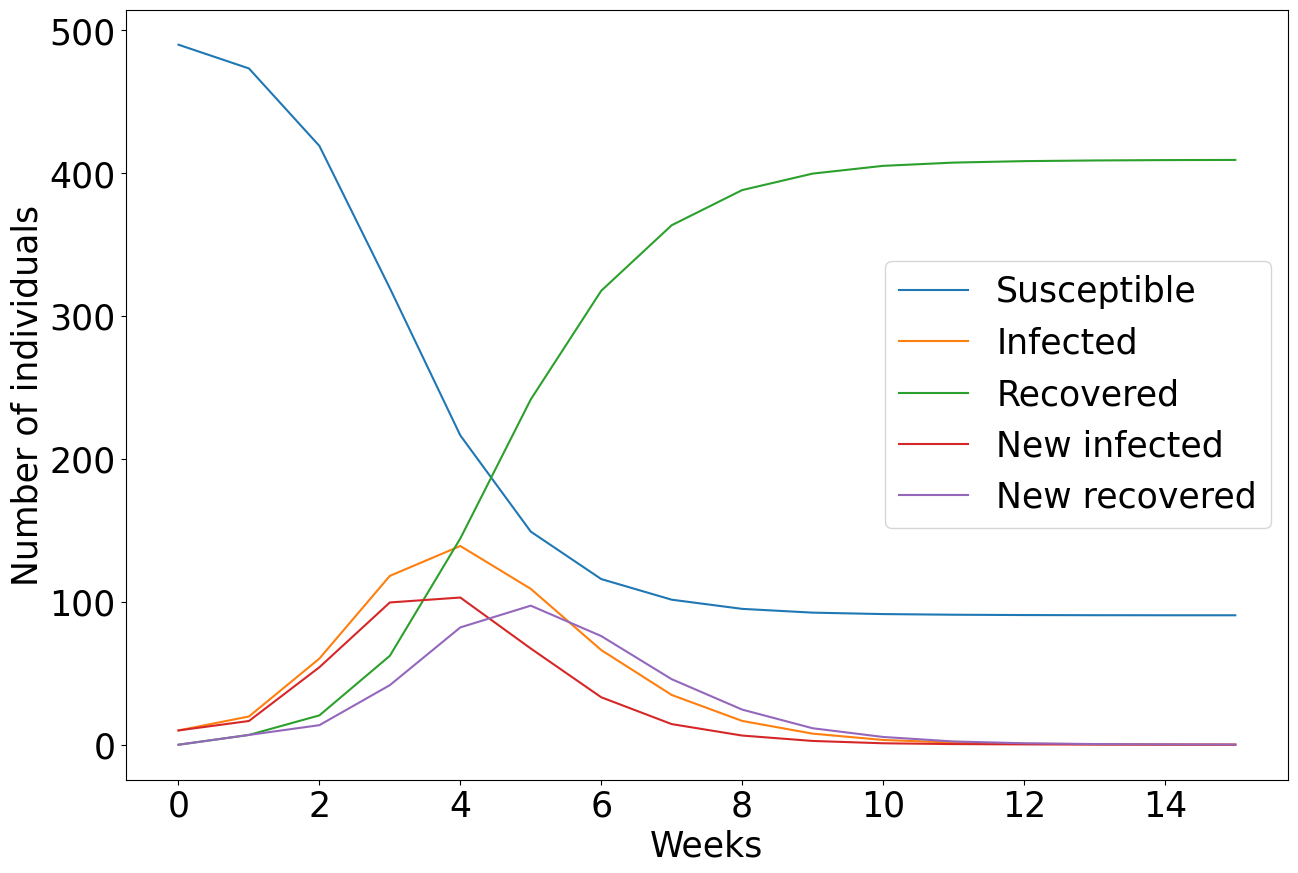

In [85]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)
labels=['Susceptible', 'Infected', 'Recovered', 'New infected', 'New recovered']
for statistics in range(5):
    trajectory = np.array(stat).T[statistics,:]
    ax.plot(trajectory, label=labels[statistics])
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex2.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


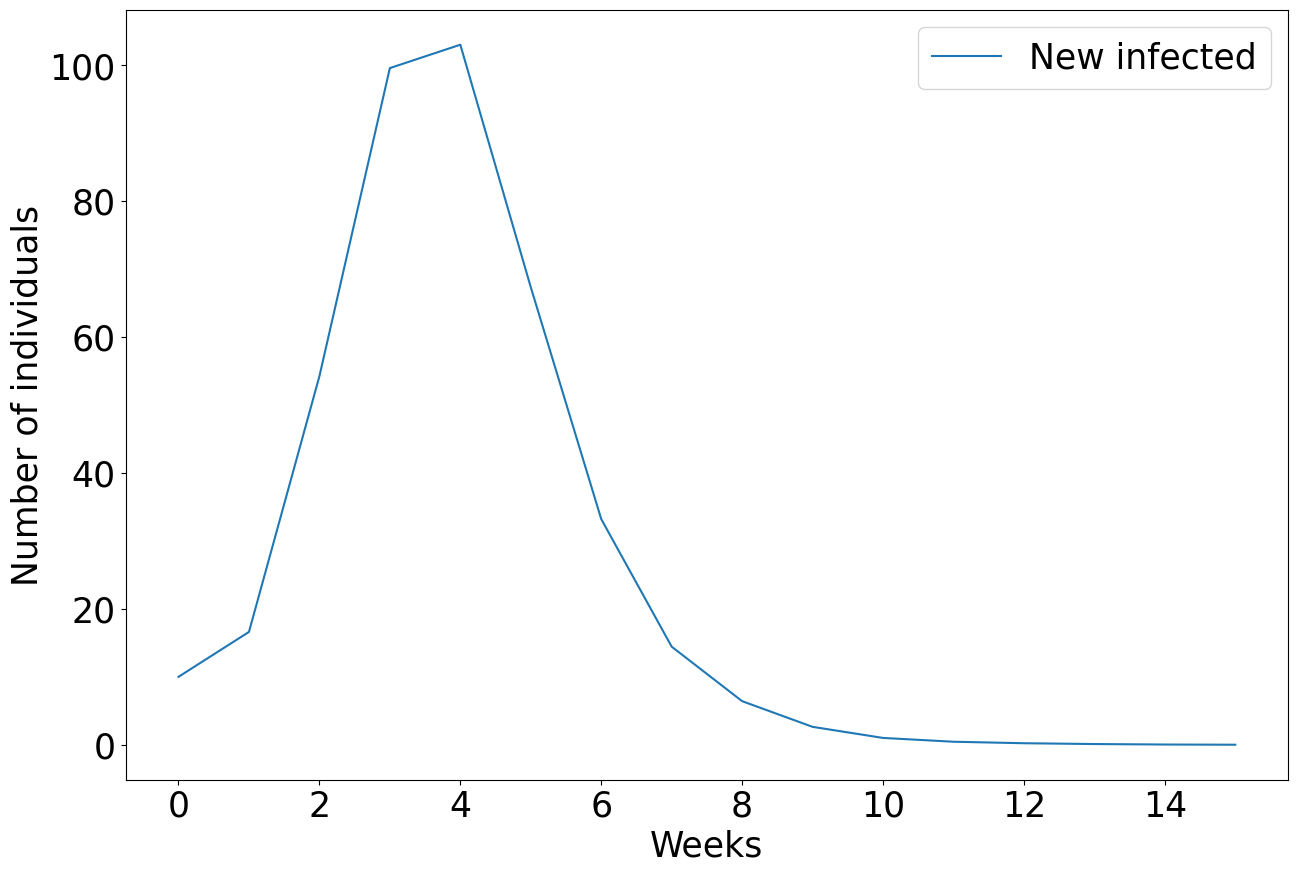

In [86]:
plt.style.use('default')
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)

ax.plot(stat[:,3], label='New infected')
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex2_new.eps",format='eps')

## 3

In [14]:
def simulate_SIR_withVaccination(G, n_weeks, beta, rho, start_infected_n, weekly_vax_percentage):
    # S=0 
    # I=1
    # R=2
    # V=3 vaccinated
    
    tot_population=len(G.nodes())
    #list of people to vaccinate (identified by their node label)
    people_to_vaccinate=list(G.nodes())
    
    changes=np.zeros(3, dtype=int)

    state=np.zeros(len(G)-start_infected_n)
    #insert infected people in the population
    state=np.insert(state, np.random.choice(len(state), size=start_infected_n), np.ones(start_infected_n))
    
    #percentage of people to vaccinate in the current week
    percentage_to_vaccinate=weekly_vax_percentage[0]
    #number of people to vaccinate
    num_to_vaccinate=int(tot_population*percentage_to_vaccinate/100)
    
    #list of people to vaccinate without the original infected (used only now)
    people_to_vaccinate_withoutInfected=[person for person in people_to_vaccinate if state[person]!=1]
    #select vaccinated people randomly among the ones awaiting vaccination
    people_vaccinated=np.random.choice(people_to_vaccinate_withoutInfected, size=num_to_vaccinate, replace=False)
    
    #original version which doesn't preserve the initial infected
    #select vaccinated people randomly among the ones awaiting vaccination
    #people_vaccinated=np.random.choice(people_to_vaccinate, size=num_to_vaccinate, replace=False)
    
    #update list of people to vaccinate
    people_to_vaccinate = [person for person in people_to_vaccinate if person not in people_vaccinated]
    
    changes[0]=start_infected_n
    changes[1]=0
    
    for p in people_vaccinated:
        state[p]=3
        changes[2]+=1
    
    week_stats=np.array([compute_week_stats(Counter(state), changes,vaccine=True)])

    for week in range(n_weeks):
        changes=np.zeros(3, dtype=int)
        
        #vaccinate people
        #select a certain number of people, among the non vaccinated, following the percentage of vaccinated people given
        if week<14:
            percentage_to_vaccinate=weekly_vax_percentage[week+1]-weekly_vax_percentage[week]
            num_to_vaccinate=int(tot_population*percentage_to_vaccinate/100)
            people_vaccinated=np.random.choice(people_to_vaccinate, size=num_to_vaccinate, replace=False)
            
            people_to_vaccinate_new = [person for person in people_to_vaccinate if person not in people_vaccinated]
            
            people_to_vaccinate=copy.deepcopy(people_to_vaccinate_new)
            
            for p in people_vaccinated:
                state[p]=3
                changes[2]+=1
            
        state_old=copy.deepcopy(state)
        
        for agent in G.nodes():
            
            if(state_old[agent]==0):
                #agent is susceptible and can be infected
                m=0
                for neighbor in G.neighbors(agent):
                    if state_old[neighbor]==1:
                        m+=1
                
                #probability of not getting infected
                prob=np.power(1-beta, m)
                state[agent]=np.random.choice([0,1], p=[prob, 1-prob])
                if(state[agent]==1):
                    changes[0]+=1
                
                
            elif(state_old[agent]==1):
                #agent is infected but can recover
                state[agent]=np.random.choice([1,2], p=[1-rho, rho])
                if(state[agent]==2):
                    changes[1]+=1
                    
        week_stats=np.vstack([week_stats, compute_week_stats(Counter(state), changes,vaccine=True)])

    return week_stats

In [87]:
weekly_vax_percentage=[0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]
G_v=generate_RandomGraph_PA(6,500)
stat=simulate_SIR_withVaccination(G_v, 15, 0.3, 0.7, 10, weekly_vax_percentage)
for iter in range(99):
    stat+=simulate_SIR_withVaccination(G_v, 15, 0.3, 0.7, 10, weekly_vax_percentage)
stat=stat/100

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


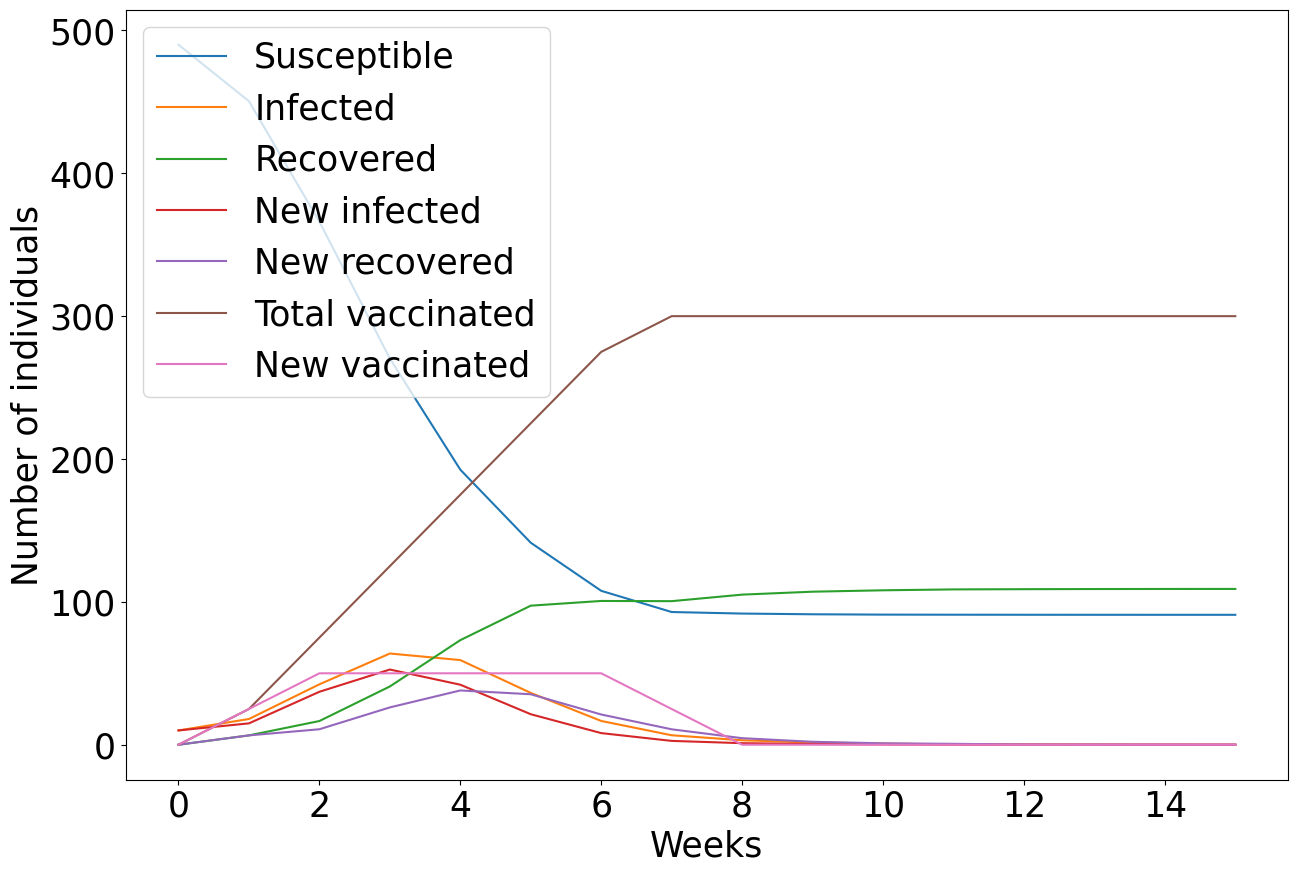

In [88]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)
labels=['Susceptible', 'Infected', 'Recovered', 'New infected', 'New recovered', 'Total vaccinated','New vaccinated']
for statistics in range(7):
    trajectory = np.array(stat).T[statistics,:]
    ax.plot(trajectory, label=labels[statistics])
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex3.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


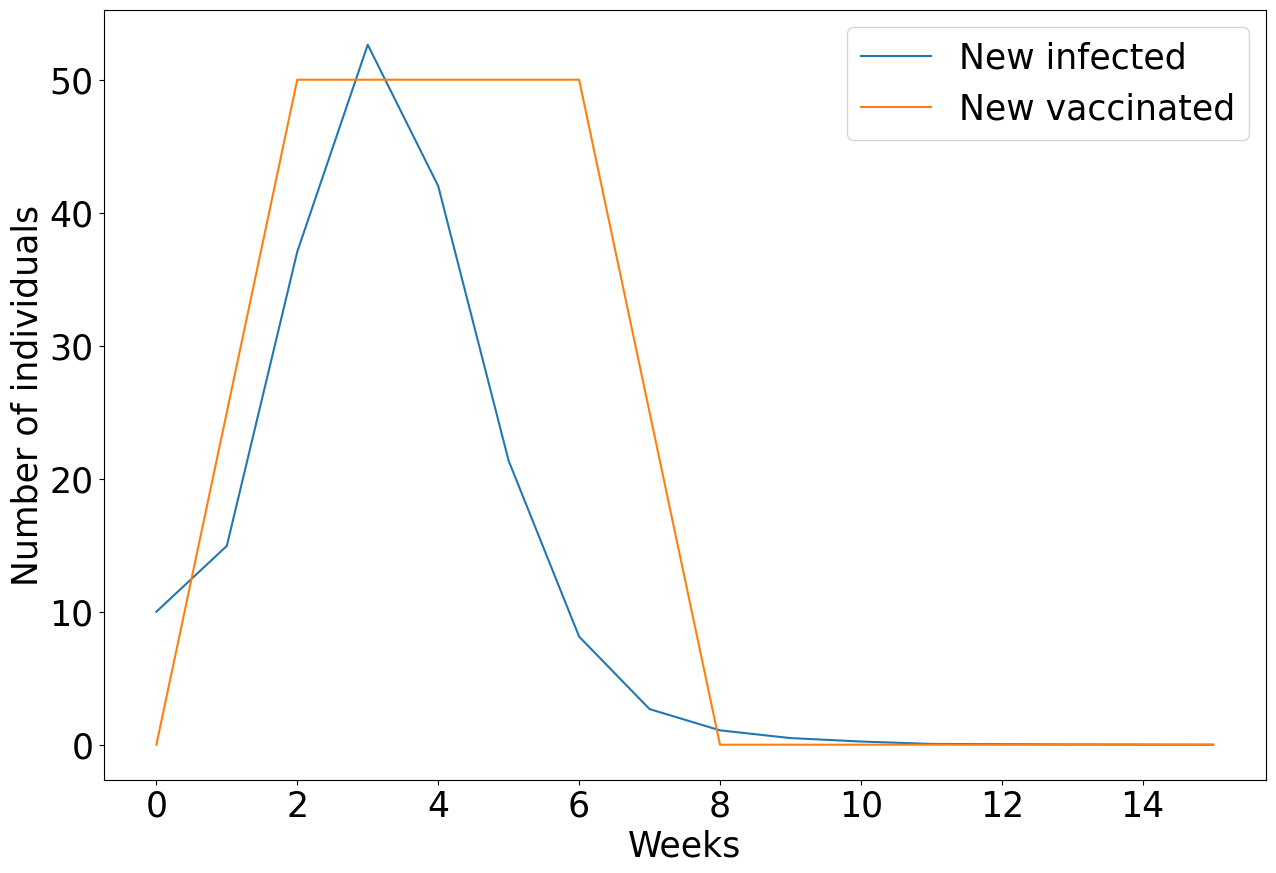

In [89]:
plt.style.use('default')
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)

ax.plot(stat[:,3], label='New infected')
ax.plot(stat[:,6], label='New vaccinated')
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex3_new.eps",format='eps')

## 4

In [17]:
#generate parameter space according to parameters restrictions
def param_space(x_0, x_delta, i):
    lower=x_0-x_delta
    upper=x_0+x_delta
    
    if(i==0):
        #must be integer and non negative
        x_delta=round(x_delta)
        lower=x_0-x_delta
        upper=x_0+x_delta
        if(lower<0):
            lower=0
    elif(i==1 or i==2 or i==3):
        #must have values in [0,1]
        if(lower<0):
            lower=0
        if(upper>1):
            upper=1

    return [lower, x_0, upper]


In [18]:
weekly_vax_percentage=[5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60]
true_newly_infected=[1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

#k, beta, rho
param_0=[10,0.3,0.6]
param_delta_start=[2,0.1,0.1]

param_delta=param_delta_start

min_rmse=np.inf

#the stage value represents how the algorithm should work:
#if stage=0 improvements are found by mantaining the same delta values
#if stage=1 improvements are not being found and it is tried to decrease delta values, if an improvement is then found 
#           we return to stage 0 with the obtaned delta values, otherwise we go to stage 2
#if stage=2 an improvement has not been found, even by changing delta values, so the algorithm stops and returns the best found configuration

stage=0

while(stage<2):
    improving=False
    param_range=list()
    for i in range(3):
        param_range.append(param_space(param_0[i], param_delta[i], i))
        

    prod=list(itertools.product(*param_range))

    
    for combination in prod:
        k=combination[0]
        beta=combination[1]
        rho=combination[2]

        G=generate_RandomGraph_PA(k,934)

        stat=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        for iter in range(9):
            stat+=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        stat=stat/10

        stat_infected=stat[:,3]

        rmse=np.sqrt(1/15*np.sum(np.power(stat_infected[-15:]-true_newly_infected[-15:],2)))

        if(rmse<min_rmse):
            improving=True
            best_comb=combination
            min_rmse=rmse
            best_stat=stat
            print("Improvement found: RMSE: {} config: {} stage:{}\n".format(min_rmse, best_comb, stage))
        else:
            print("Not Improving RMSE:{} config: {}".format(rmse,combination))
            
    if improving:
        print("stage 0")
        stage=0
        param_0=best_comb
    else:
        stage+=1
        if(stage<2):
            print("go to stage 1")
            param_delta=np.array(param_delta)/2
        else:
            print("go to stage 2 and finish")

print("minimum RMSE",min_rmse)
print("Best combination", best_comb)
best_stat_4=best_stat
np.save("./results/4/best_stat_4", best_stat_4, allow_pickle=True, fix_imports=True)
np.save("./results/4/best_stat_4_comb", best_comb, allow_pickle=True, fix_imports=True)
np.save("./results/4/best_stat_4_rmse", min_rmse, allow_pickle=True, fix_imports=True)

Improvement found: RMSE: 9.263224780460277 config: (8, 0.19999999999999998, 0.5) stage:0

Improvement found: RMSE: 6.521554007034418 config: (8, 0.19999999999999998, 0.6) stage:0

Not Improving RMSE:6.963332535503386 config: (8, 0.19999999999999998, 0.7)
Not Improving RMSE:25.193769070942917 config: (8, 0.3, 0.5)
Not Improving RMSE:12.157521677271784 config: (8, 0.3, 0.6)
Not Improving RMSE:6.714412359494562 config: (8, 0.3, 0.7)
Not Improving RMSE:37.70369566324589 config: (8, 0.4, 0.5)
Not Improving RMSE:38.45350439166761 config: (8, 0.4, 0.6)
Not Improving RMSE:40.36366352715439 config: (8, 0.4, 0.7)
Improvement found: RMSE: 6.013373983602439 config: (10, 0.19999999999999998, 0.5) stage:0

Improvement found: RMSE: 5.866060574752588 config: (10, 0.19999999999999998, 0.6) stage:0

Not Improving RMSE:7.199259221151391 config: (10, 0.19999999999999998, 0.7)
Not Improving RMSE:36.58727465481225 config: (10, 0.3, 0.5)
Not Improving RMSE:36.023418309020414 config: (10, 0.3, 0.6)
Not Improv

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


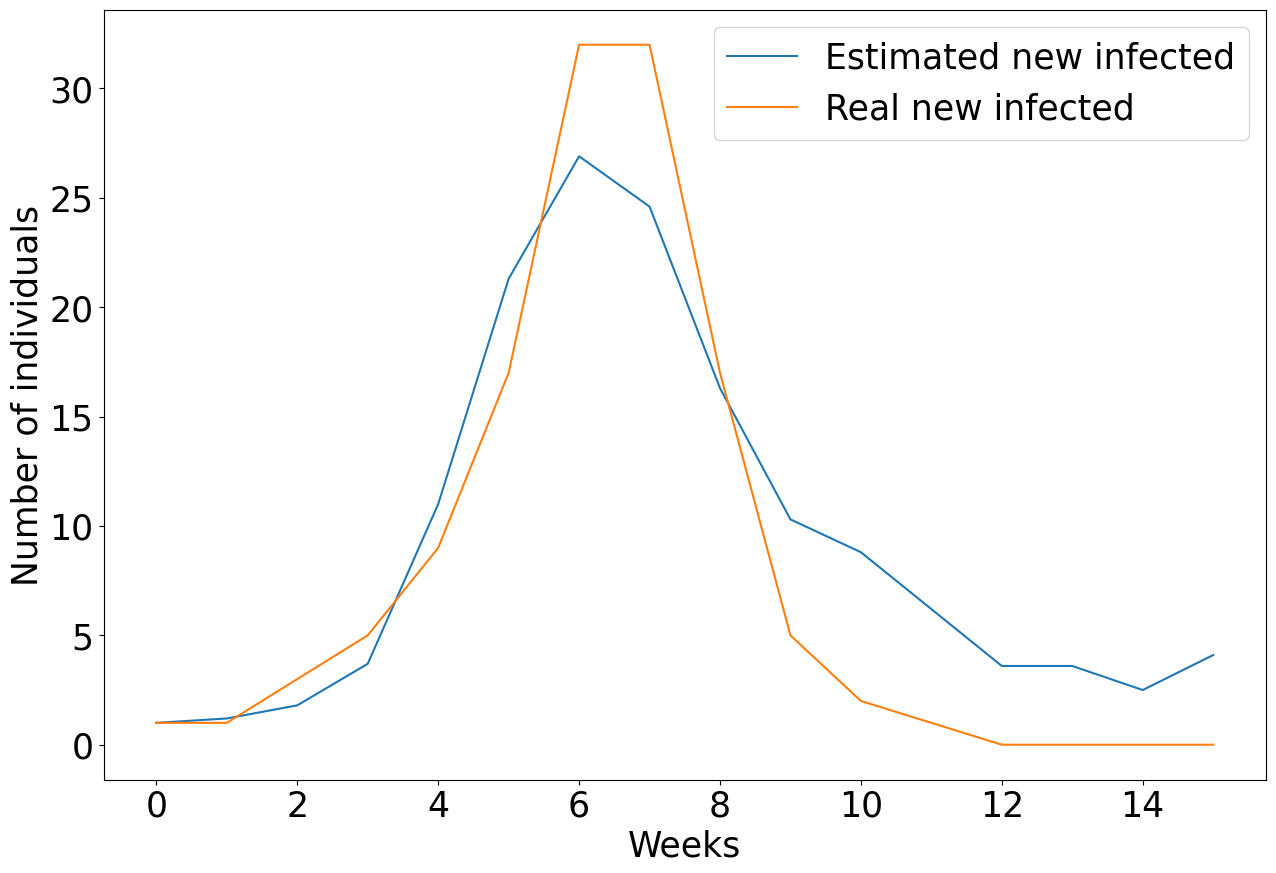

In [19]:
plt.style.use('default')
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)


ax.plot(best_stat_4[:,3], label='Estimated new infected')
ax.plot(true_newly_infected, label='Real new infected')
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex4_1.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


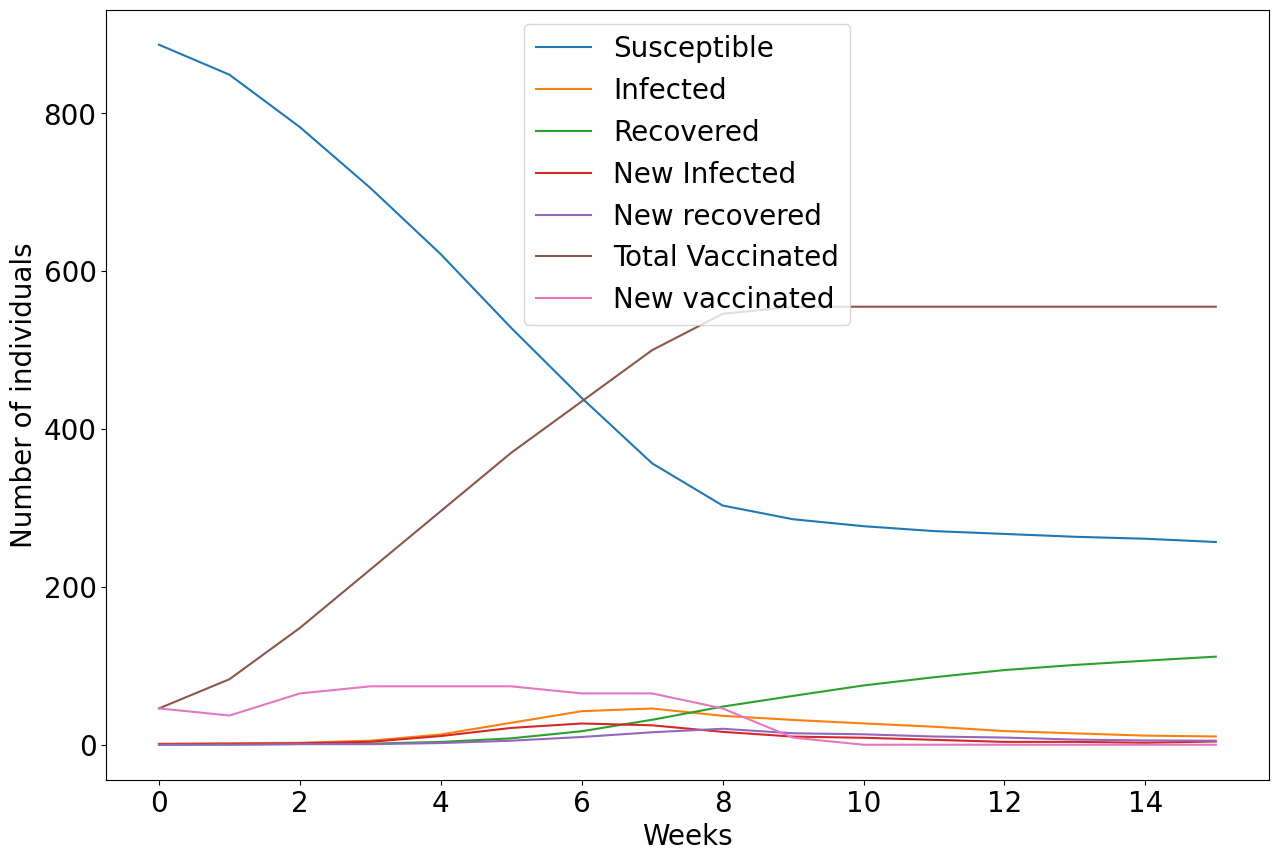

In [20]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 20
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)
labels=['Susceptible', 'Infected', 'Recovered', 'New Infected', 'New recovered', 'Total Vaccinated','New vaccinated']
for statistics in range(7):
    trajectory = np.array(best_stat_4).T[statistics,:]
    ax.plot(trajectory, label=labels[statistics])
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex4_2.eps",format='eps')

## 5

## Small world network

In [21]:
weekly_vax_percentage=[5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60]
true_newly_infected=[1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

#k, beta, rho
param_0=[10,0.3,0.6, 0.5]
param_delta_start=[2,0.1,0.1, 0.1]

param_delta=param_delta_start

min_rmse=np.inf

#the stage value represents how the algorithm should work:
#if stage=0 improvements are found by mantaining the same delta values
#if stage=1 improvements are not being found and it is tried to decrease delta values, if an improvement is then found 
#           we return to stage 0 with the obtaned delta values, otherwise we go to stage 2
#if stage=2 an improvement has not been found, even by changing delta values, so the algorithm stops and returns the best found configuration

stage=0

while(stage<2):
    improving=False
    param_range=list()
    for i in range(4):
        param_range.append(param_space(param_0[i], param_delta[i], i))
        

    prod=list(itertools.product(*param_range))

    
    for combination in prod:
        k=combination[0]
        beta=combination[1]
        rho=combination[2]
        p=combination[3]

        G=nx.random_graphs.newman_watts_strogatz_graph(934, int(k/2), p, seed=None)

        stat=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        for iter in range(9):
            stat+=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        stat=stat/10

        stat_infected=stat[:,3]

        rmse=np.sqrt(1/15*np.sum(np.power(stat_infected[-15:]-true_newly_infected[-15:],2)))

        if(rmse<min_rmse):
            improving=True
            best_comb=combination
            min_rmse=rmse
            best_stat=stat
            print("Improvement found: RMSE: {} config: {} stage:{}\n".format(min_rmse, best_comb, stage))
        else:
            print("Not Improving RMSE:{} config: {}".format(rmse,combination))
            
    if improving:
        print("stage 0")
        stage=0
        param_0=best_comb
    else:
        stage+=1
        if(stage<2):
            print("go to stage 1")
            param_delta=np.array(param_delta)/2
        else:
            print("go to stage 2 and finish")

print("minimum RMSE",min_rmse)
print("Best combination", best_comb)
best_stat_5=best_stat
np.save("./results/5_sw/best_stat_5", best_stat_5, allow_pickle=True, fix_imports=True)
np.save("./results/5_sw/best_stat_5_comb", best_comb, allow_pickle=True, fix_imports=True)
np.save("./results/5_sw/best_stat_5_rmse", min_rmse, allow_pickle=True, fix_imports=True)

Improvement found: RMSE: 13.404029244969589 config: (8, 0.19999999999999998, 0.5, 0.4) stage:0

Not Improving RMSE:13.466724422318393 config: (8, 0.19999999999999998, 0.5, 0.5)
Improvement found: RMSE: 13.246106346143131 config: (8, 0.19999999999999998, 0.5, 0.6) stage:0

Not Improving RMSE:13.443561036173909 config: (8, 0.19999999999999998, 0.6, 0.4)
Not Improving RMSE:13.472713164021567 config: (8, 0.19999999999999998, 0.6, 0.5)
Not Improving RMSE:13.340539719216759 config: (8, 0.19999999999999998, 0.6, 0.6)
Not Improving RMSE:13.446313001463759 config: (8, 0.19999999999999998, 0.7, 0.4)
Not Improving RMSE:13.4805044416001 config: (8, 0.19999999999999998, 0.7, 0.5)
Not Improving RMSE:13.309420222784562 config: (8, 0.19999999999999998, 0.7, 0.6)
Improvement found: RMSE: 12.499519990783647 config: (8, 0.3, 0.5, 0.4) stage:0

Improvement found: RMSE: 11.48729733227098 config: (8, 0.3, 0.5, 0.5) stage:0

Not Improving RMSE:12.358748588213398 config: (8, 0.3, 0.5, 0.6)
Not Improving RMSE:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


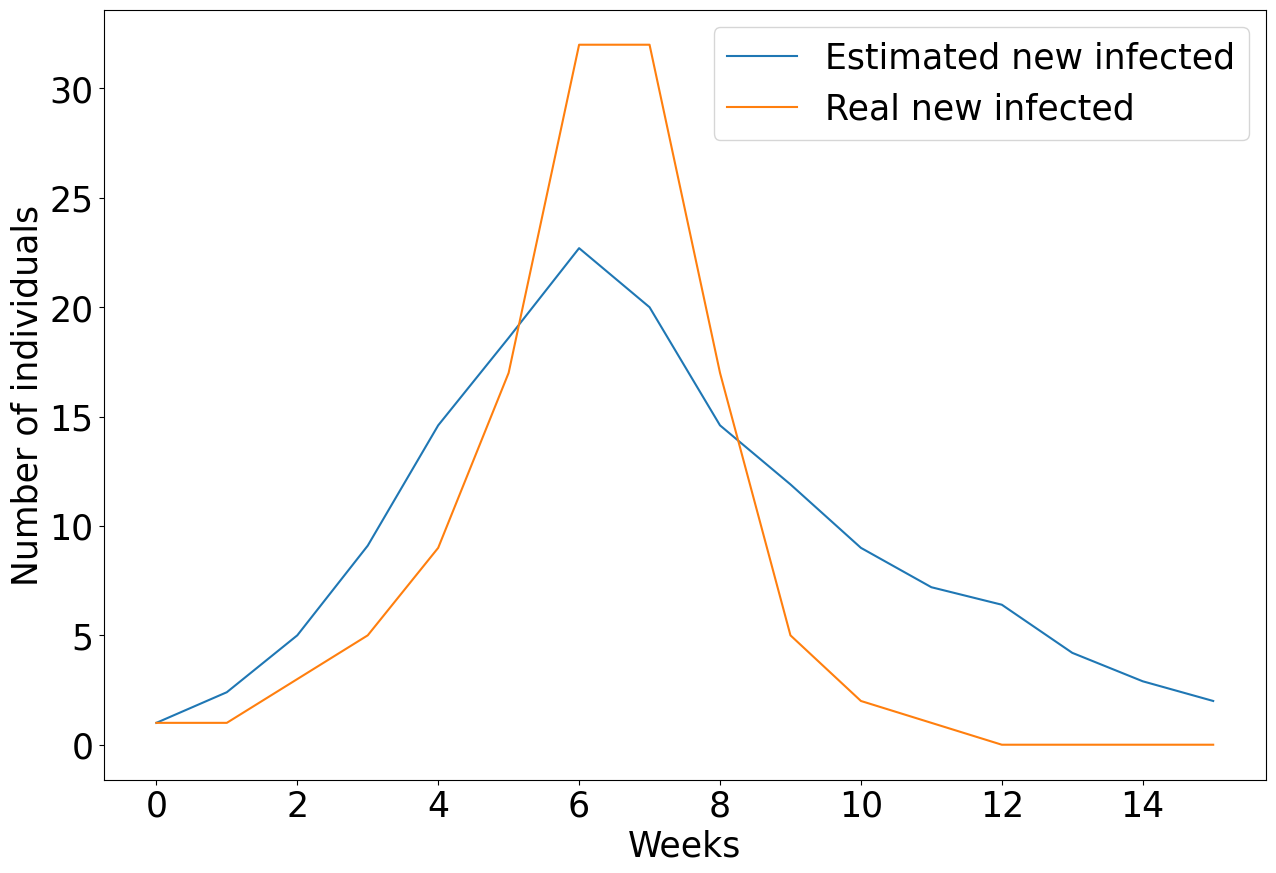

In [22]:
plt.style.use('default')
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)


ax.plot(best_stat_5[:,3], label='Estimated new infected')
ax.plot(true_newly_infected, label='Real new infected')
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex5_1_sw.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


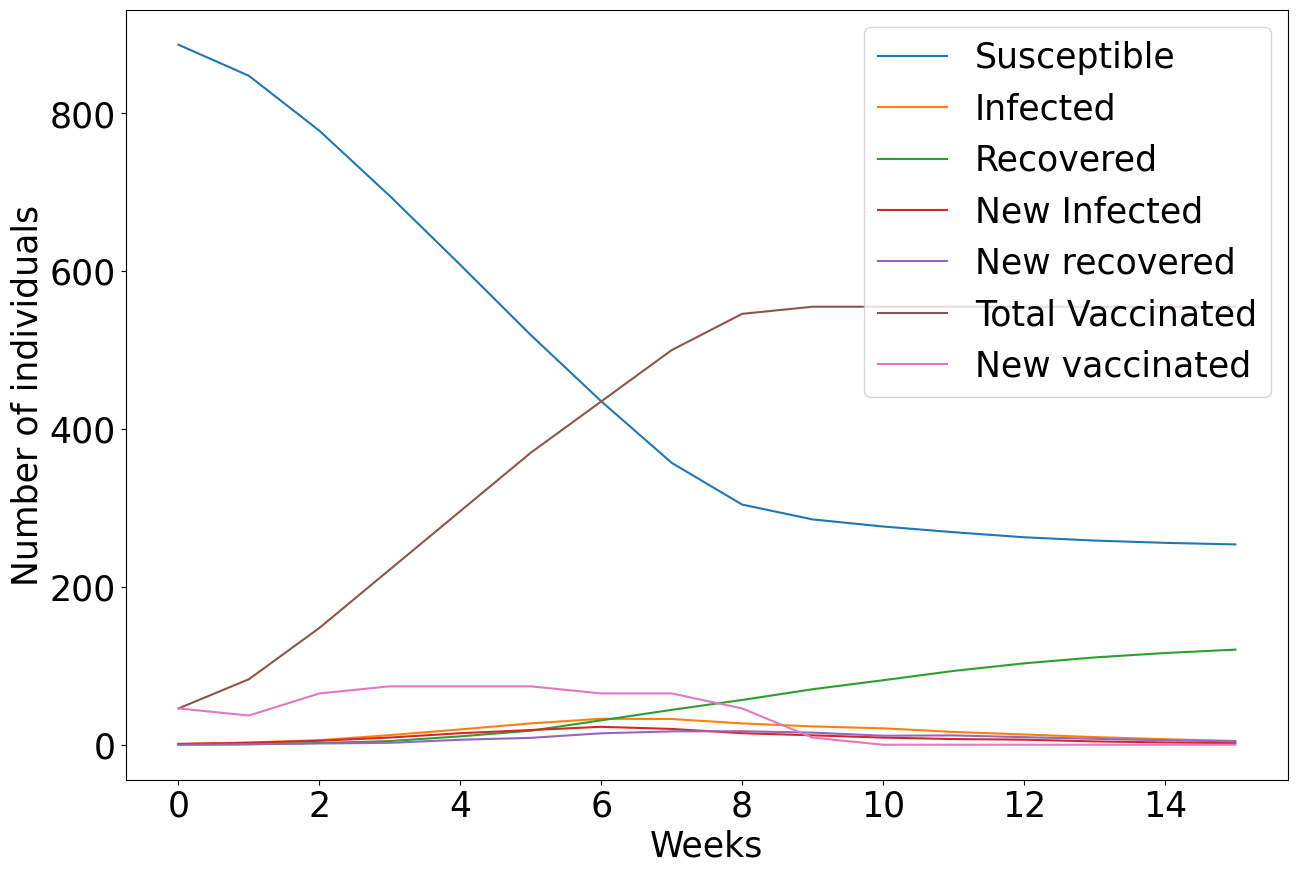

In [23]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)
labels=['Susceptible', 'Infected', 'Recovered', 'New Infected', 'New recovered', 'Total Vaccinated','New vaccinated']
for statistics in range(7):
    trajectory = np.array(best_stat_5).T[statistics,:]
    ax.plot(trajectory, label=labels[statistics])
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex5_2_sw.eps",format='eps')

## MAE as metric

In [24]:
weekly_vax_percentage=[5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60]
true_newly_infected=[1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

#k, beta, rho
param_0=[10,0.3,0.6]
param_delta_start=[2,0.1,0.1]

param_delta=param_delta_start

min_mae=np.inf

#the stage value represents how the algorithm should work:
#if stage=0 improvements are found by mantaining the same delta values
#if stage=1 improvements are not being found and it is tried to decrease delta values, if an improvement is then found 
#           we return to stage 0 with the obtaned delta values, otherwise we go to stage 2
#if stage=2 an improvement has not been found, even by changing delta values, so the algorithm stops and returns the best found configuration

stage=0

while(stage<2):
    improving=False
    param_range=list()
    for i in range(3):
        param_range.append(param_space(param_0[i], param_delta[i], i))
        

    prod=list(itertools.product(*param_range))

    
    for combination in prod:
        k=combination[0]
        beta=combination[1]
        rho=combination[2]

        G=generate_RandomGraph_PA(k,934)

        stat=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        for iter in range(9):
            stat+=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        stat=stat/10

        stat_infected=stat[:,3]

        mae=1/15*np.sum(np.abs(stat_infected[-15:]-true_newly_infected[-15:]))

        if(mae<min_mae):
            improving=True
            best_comb=combination
            min_mae=mae
            best_stat=stat
            print("Improvement found: MAE: {} config: {} stage:{}\n".format(min_mae, best_comb, stage))
        else:
            print("Not Improving MAE:{} config: {}".format(mae,combination))
            
    if improving:
        print("stage 0")
        stage=0
        param_0=best_comb
    else:
        stage+=1
        if(stage<2):
            print("go to stage 1")
            param_delta=np.array(param_delta)/2
        else:
            print("go to stage 2 and finish")

print("minimum MAE",min_mae)
print("Best combination", best_comb)
best_stat_5_mae=best_stat
np.save("./results/5_mae/best_stat_5", best_stat_4, allow_pickle=True, fix_imports=True)
np.save("./results/5_mae/best_stat_5_comb", best_comb, allow_pickle=True, fix_imports=True)
np.save("./results/5_mae/best_stat_5_mae", min_rmse, allow_pickle=True, fix_imports=True)

Improvement found: MAE: 6.659999999999999 config: (8, 0.19999999999999998, 0.5) stage:0

Improvement found: MAE: 4.086666666666666 config: (8, 0.19999999999999998, 0.6) stage:0

Not Improving MAE:5.16 config: (8, 0.19999999999999998, 0.7)
Not Improving MAE:11.406666666666666 config: (8, 0.3, 0.5)
Not Improving MAE:12.439999999999998 config: (8, 0.3, 0.6)
Not Improving MAE:11.233333333333334 config: (8, 0.3, 0.7)
Not Improving MAE:18.866666666666667 config: (8, 0.4, 0.5)
Not Improving MAE:19.68 config: (8, 0.4, 0.6)
Not Improving MAE:18.0 config: (8, 0.4, 0.7)
Not Improving MAE:5.319999999999999 config: (10, 0.19999999999999998, 0.5)
Not Improving MAE:7.0600000000000005 config: (10, 0.19999999999999998, 0.6)
Not Improving MAE:5.266666666666666 config: (10, 0.19999999999999998, 0.7)
Not Improving MAE:18.53333333333333 config: (10, 0.3, 0.5)
Not Improving MAE:13.246666666666668 config: (10, 0.3, 0.6)
Not Improving MAE:22.12666666666667 config: (10, 0.3, 0.7)
Not Improving MAE:22.126666666

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


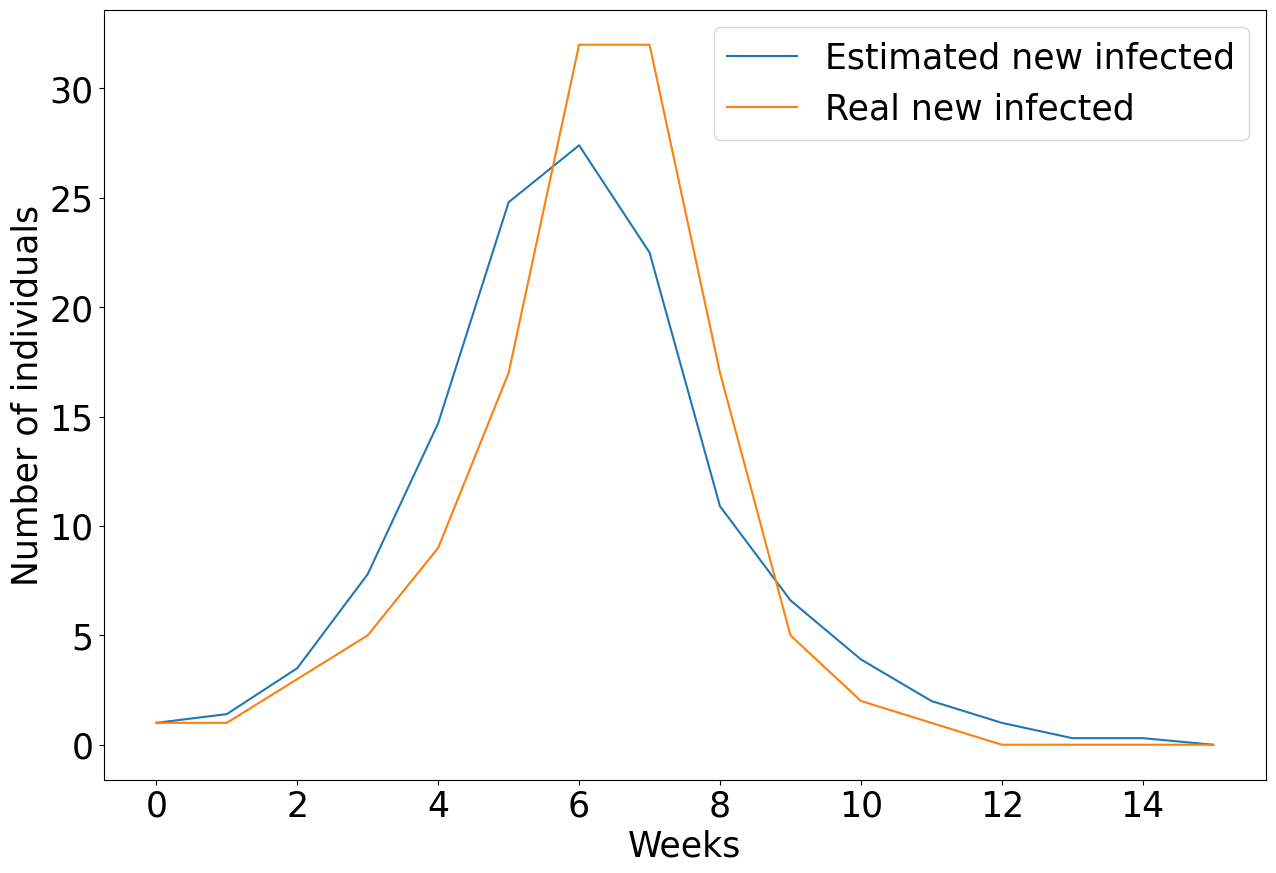

In [25]:
plt.style.use('default')
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)


ax.plot(best_stat_5_mae[:,3], label='Estimated new infected')
ax.plot(true_newly_infected, label='Real new infected')
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex5_1_mae.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


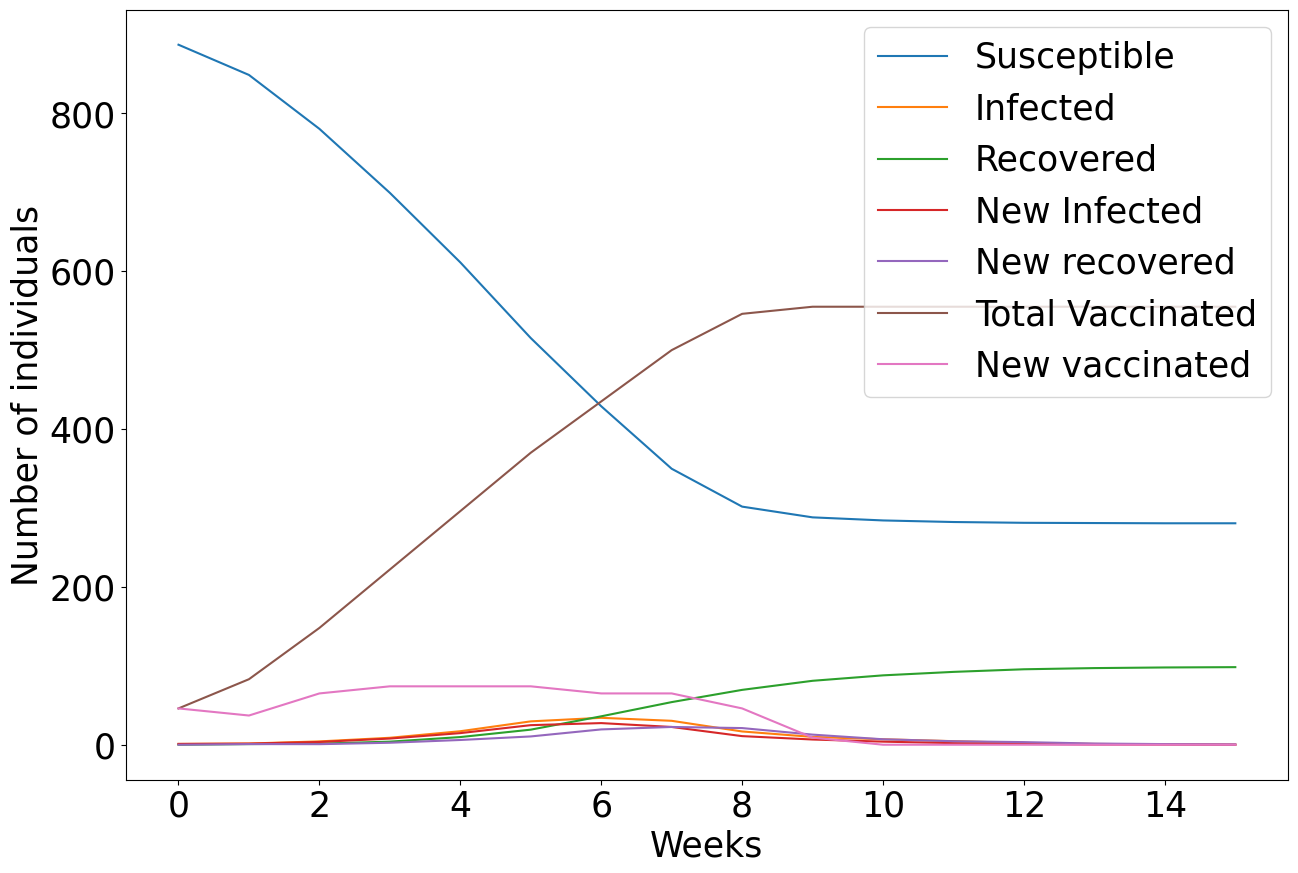

In [28]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)
labels=['Susceptible', 'Infected', 'Recovered', 'New Infected', 'New recovered', 'Total Vaccinated','New vaccinated']
for statistics in range(7):
    trajectory = np.array(best_stat_5_mae).T[statistics,:]
    ax.plot(trajectory, label=labels[statistics])
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex5_2_mae.eps",format='eps')

## Random Search

In [53]:
def param_space_random(x_0, x_delta, i):
    lower=x_0-x_delta
    upper=x_0+x_delta
    
    if(i==0):
        #must be integer and non negative
        x_delta=round(x_delta)
        lower=x_0-x_delta
        upper=x_0+x_delta
        if(lower<0):
            lower=0
        return np.random.randint(low=lower, high=upper, size=1)[0]
    elif(i==1 or i==2 or i==3):
        #must have values in [0,1]
        if(lower<0):
            lower=0
        if(upper>1):
            upper=1
        return np.random.uniform(low=lower, high=upper, size=1)[0]
    
    return

In [72]:
weekly_vax_percentage=[5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60]
true_newly_infected=[1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

#k, beta, rho
param_0=[10,0.5,0.5]
param_delta_start=[5,0.4,0.4]

param_delta=param_delta_start

min_rmse=np.inf

#the stage value represents how the algorithm should work:
#if stage=0 improvements are found by mantaining the same delta values
#if stage=1 improvements are not being found and it is tried to decrease delta values, if an improvement is then found 
#           we return to stage 0 with the obtaned delta values, otherwise we go to stage 2
#if stage=2 an improvement has not been found, even by changing delta values, so the algorithm stops and returns the best found configuration

stage=0

while(stage<2):
    improving=False
    
    for j in range(30):
        combination=list()
        for i in range(3):
            combination.append(param_space_random(param_0[i], param_delta[i], i))
            
        k=combination[0]
        beta=combination[1]
        rho=combination[2]
    
        G=generate_RandomGraph_PA(k,934)

        stat=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        for iter in range(9):
            stat+=simulate_SIR_withVaccination(G, 15, beta, rho, 1, weekly_vax_percentage)
        stat=stat/10

        stat_infected=stat[:,3]

        rmse=np.sqrt(1/15*np.sum(np.power(stat_infected[-15:]-true_newly_infected[-15:],2)))

        if(rmse<min_rmse):
            improving=True
            best_comb=combination
            min_rmse=rmse
            best_stat=stat
            print("Improvement found: RMSE: {} config: {} stage:{}\n".format(min_rmse, best_comb, stage))
        else:
            print("Not Improving RMSE:{} config: {}".format(rmse,combination))
    
    if improving:
        print("stage 0")
        stage=0
        param_0=best_comb
    else:
        stage+=1
        if(stage<2):
            print("go to stage 1")
            param_delta=np.array(param_delta)/2
        else:
            print("go to stage 2 and finish")

print("minimum RMSE",min_rmse)
print("Best combination", best_comb)
best_stat_5_random=best_stat
np.save("./results/5_random/best_stat_5", best_stat_5_random, allow_pickle=True, fix_imports=True)
np.save("./results/5_random/best_stat_5_comb", best_comb, allow_pickle=True, fix_imports=True)
np.save("./results/5_random/best_stat_5_rmse", min_rmse, allow_pickle=True, fix_imports=True)

Improvement found: RMSE: 68.29073631662399 config: [6, 0.7499109504054706, 0.8524301440432297] stage:0

Improvement found: RMSE: 10.518998684919271 config: [6, 0.19866181792798576, 0.12788447578244388] stage:0

Not Improving RMSE:94.7403046930573 config: [13, 0.7788066846844802, 0.46843513928480957]
Not Improving RMSE:77.54995379323789 config: [10, 0.6080273710649592, 0.1794212597371219]
Not Improving RMSE:18.065842539628942 config: [6, 0.3951275280369999, 0.48108013141230055]
Not Improving RMSE:121.6508254527413 config: [14, 0.8602954395732479, 0.5306702496105398]
Not Improving RMSE:12.139741897311216 config: [10, 0.16593649786451203, 0.1504778434808428]
Not Improving RMSE:12.187917514216009 config: [6, 0.18624340666493858, 0.6907431402891573]
Not Improving RMSE:110.18924327416599 config: [10, 0.8655739267790316, 0.6008360012090808]
Improvement found: RMSE: 9.87768528890583 config: [14, 0.10283157798831366, 0.17486471634136985] stage:0

Not Improving RMSE:12.36082521517071 config: [5,

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


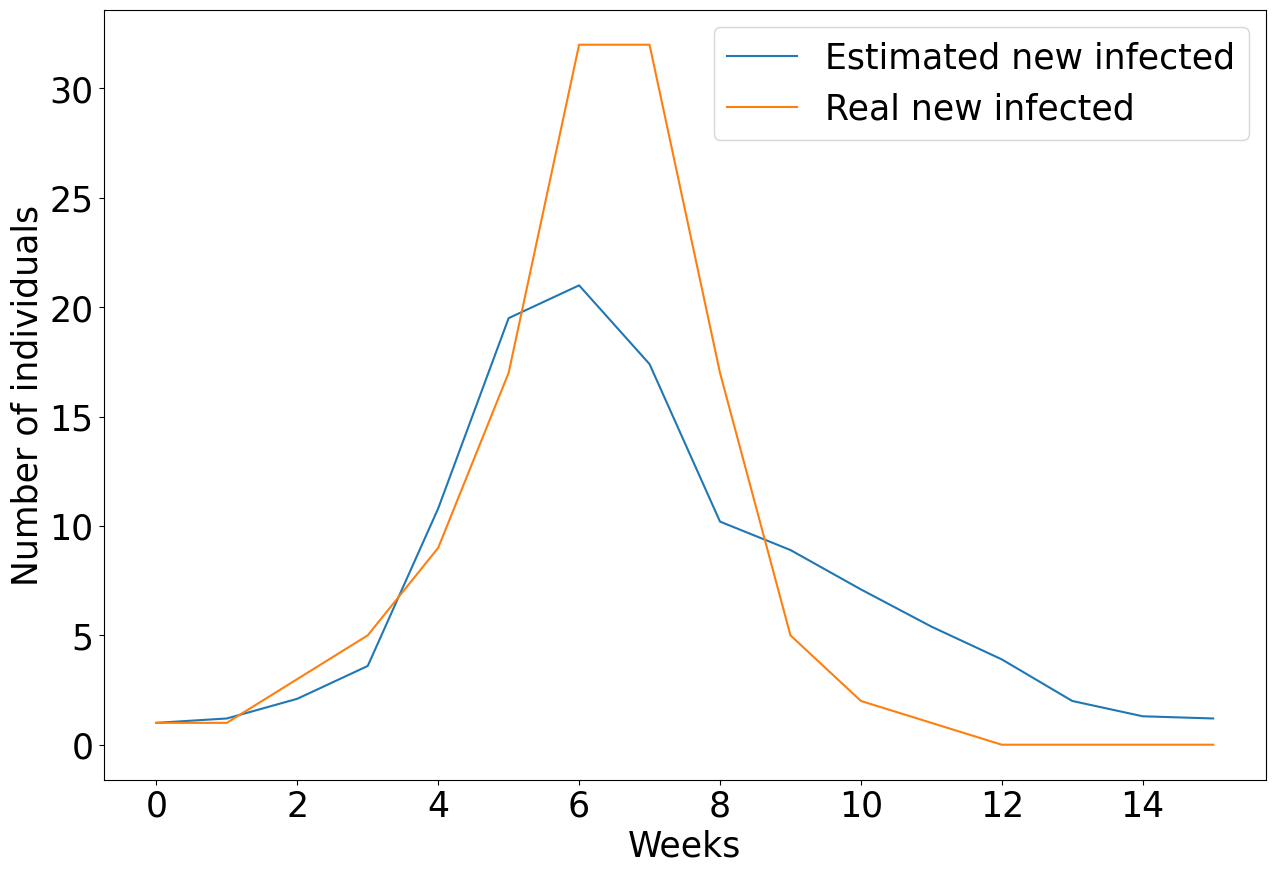

In [73]:
plt.style.use('default')
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)


ax.plot(best_stat_5_random[:,3], label='Estimated new infected')
ax.plot(true_newly_infected, label='Real new infected')
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex5_1_random.eps",format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


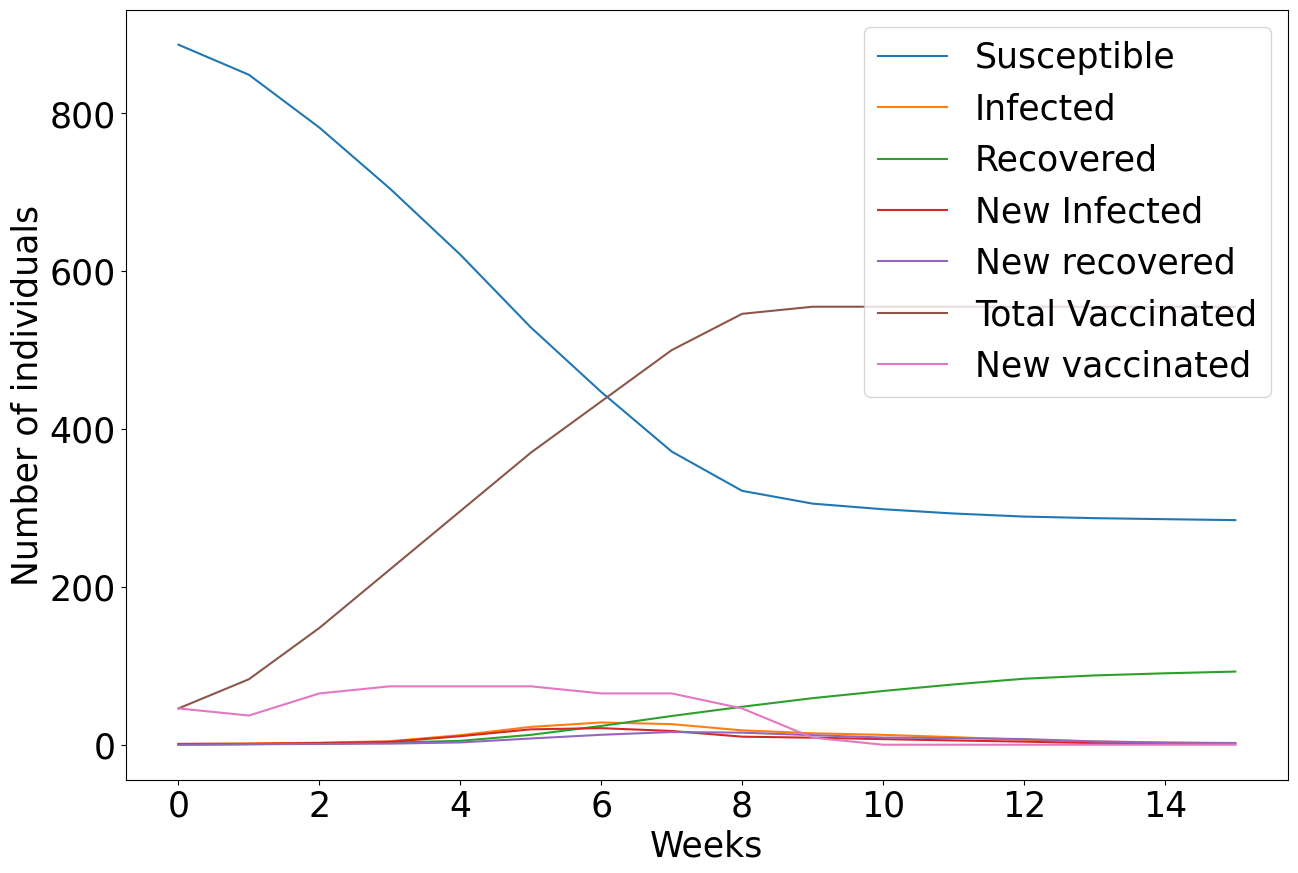

In [74]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
fontsize = 25
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fontsize)
labels=['Susceptible', 'Infected', 'Recovered', 'New Infected', 'New recovered', 'Total Vaccinated','New vaccinated']
for statistics in range(7):
    trajectory = np.array(best_stat_5_random).T[statistics,:]
    ax.plot(trajectory, label=labels[statistics])
ax.set_xlabel("Weeks",fontsize=fontsize)
ax.set_ylabel("Number of individuals",fontsize=fontsize)    
ax.legend(prop={"size":fontsize})
fig.savefig("./images/ex5_2_random.eps",format='eps')